In [23]:
import random
import librosa
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import convolve, butter, lfilter

In [16]:
#done
def add_white_noise(signal, noise_percentage_factor):
    noise = np.random.normal(0, signal.std(), signal.size)
    augmented_signal = signal + noise * noise_percentage_factor
    return augmented_signal

In [44]:
#done
# def time_stretch(signal, time_stretch_rate):
#     # """Time stretching implemented with librosa:
#     # https://librosa.org/doc/main/generated/librosa.effects.pitch_shift.html?highlight=pitch%20shift#librosa.effects.pitch_shift
#     # """
#     return librosa.effects.time_stretch(signal, time_stretch_rate)


def time_stretch(audio, factor=0.95):
    # audio: Original audio
    # factor: Time stretching factor (e.g., 0.8 for 80% speed)

    augmented_audio = librosa.effects.time_stretch(audio)
    
    return augmented_audio

In [30]:
#impulse response addition
def add_impulse_response(audio, impulse_response, scaling_factor=1.0):
    # audio: Original audio
    # impulse_response_segments: List of impulse response segments
    # scaling_factor: Scaling factor for the impulse response
    
    # Normalize each impulse response segment
    normalized_segments = [segment / np.max(np.abs(segment)) for segment in impulse_response_segments]
    
    # Initialize an empty array to store the convolved audio
    augmented_audio = np.zeros_like(audio)
    
    # Apply convolution with each impulse response segment
    for i, segment in enumerate(normalized_segments):
        convolved_segment = convolve(audio, segment, mode='same')
        augmented_audio += convolved_segment
    
    # Scale the augmented audio
    augmented_audio *= scaling_factor
    
    return augmented_audio

In [19]:
#low-high pass band filters
def apply_bandpass_filter(audio, lowcut, highcut, fs):
    # audio: Original audio
    # lowcut: Low cutoff frequency of the filter
    # highcut: High cutoff frequency of the filter
    # fs: Sampling frequency

    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist

    # Design bandpass filter
    b, a = butter(4, [low, high], btype='band')
    
    # Apply the filter
    augmented_audio = lfilter(b, a, audio)

    return augmented_audio

In [20]:
#time shifting
def time_shift(audio, shift_amount, fs):
    # audio: Original audio
    # shift_amount: Amount of time shift in seconds
    # fs: Sampling frequency

    shift_samples = int(shift_amount * fs)
    
    if shift_samples > 0:
        augmented_audio = np.pad(audio[:-shift_samples], (shift_samples, 0), 'constant')
    else:
        augmented_audio = np.pad(audio[-shift_samples:], (0, -shift_samples), 'constant')
    
    return augmented_audio

In [21]:
def _plot_signal_and_augmented_signal(signal, augmented_signal, sr):
    time = np.arange(0, len(signal)) / sr
    
    plt.plot(time, signal, label='Original Signal')
    plt.plot(time, augmented_signal, label='Augmented Signal')
    plt.legend()
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Original vs. Augmented Signal')
    plt.show()

In [55]:
# Load the original audio file
audio, fs = librosa.load("D:/ocean-vue/DeepShip Dataset/Cargo/2/2.wav")

# Apply noise addition
audio_with_noise = add_white_noise(audio, 0.1)

# Apply bandpass filter
# Define parameters for bandpass filter
lowcut = 500  # Low cutoff frequency in Hz
highcut = 2000  # High cutoff frequency in Hz
audio_filtered = apply_bandpass_filter(audio_with_impulse, lowcut, highcut, fs)

# Apply time shift
# Define time shift amount in seconds
shift_amount = 1.0  # Shift by 1 second
audio_shifted = time_shift(audio_filtered, shift_amount, fs)

# Apply time stretching
# Calculate the new rate based on the stretch factor
audio_stretched = librosa.effects.time_stretch(audio_shifted, rate=2.95)

# Save the augmented audio
sf.write("augmented_audio.wav",audio_stretched, fs)

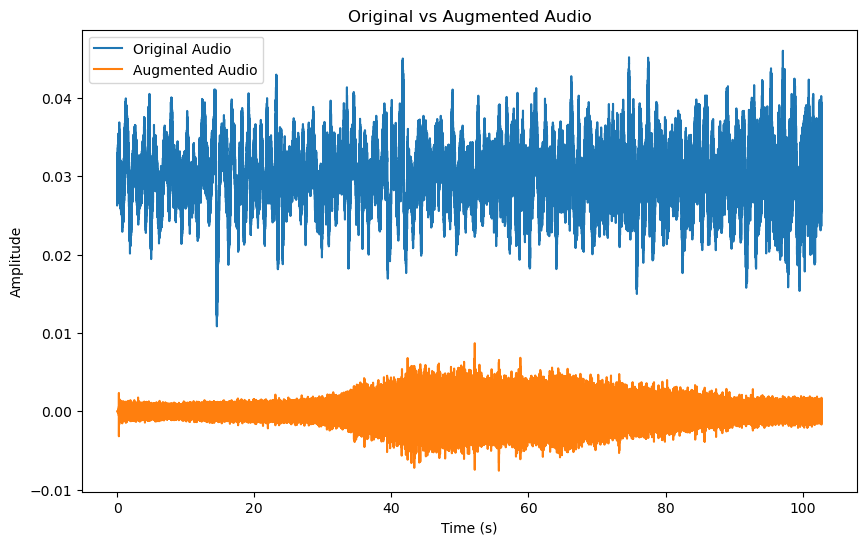

In [56]:
original_audio, fs = librosa.load(original_file, sr=None)
augmented_audio, _ = librosa.load('./augmented_audio.wav')

# Ensure both signals have the same length
min_len = min(len(audio), len(augmented_audio))
original_audio = original_audio[:min_len]
augmented_audio = augmented_audio[:min_len]

# Create a time axis
time = np.arange(0, len(original_audio)) / fs

# Plot the signals
plt.figure(figsize=(10, 6))
plt.plot(time, original_audio, label='Original Audio')
plt.plot(time, augmented_audio, label='Augmented Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original vs Augmented Audio')
plt.legend()
plt.show()

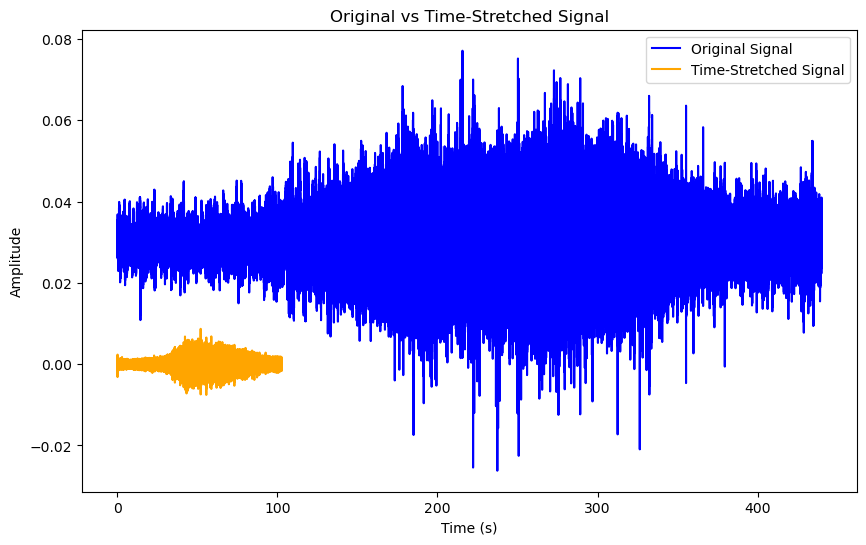

In [59]:
import librosa
import matplotlib.pyplot as plt

# Load your own original audio as x
x, fs_x = librosa.load('D:/ocean-vue/DeepShip Dataset/Cargo/2/2.wav', sr=None)

# Apply time stretching to generate y
y, fs_y = librosa.load('./augmented_audio.wav', sr=None)

# Create a time axis for both signals
time_x = np.linspace(0, len(x) / fs_x, len(x))
time_y = np.linspace(0, len(y) / fs_x, len(y))

# Plot the signals
plt.figure(figsize=(10, 6))
plt.plot(time_x, x, color='blue', label='Original Signal')
plt.plot(time_y, y, color='orange', label='Time-Stretched Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original vs Time-Stretched Signal')
plt.legend()
plt.show()


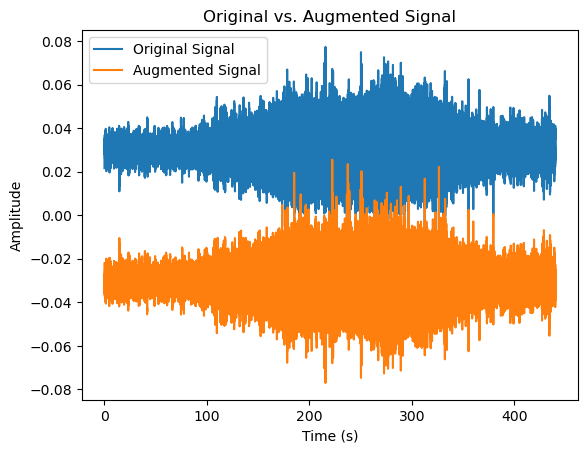

In [11]:
signal, sr = librosa.load("D:/ocean-vue/DeepShip Dataset/Cargo/2/2.wav")
augmented_signal = add_white_noise(signal, 0.1)
sf.write("augmented_audio.wav", augmented_signal, sr)
_plot_signal_and_augmented_signal(signal, audio_stretched, sr)